In [2]:
import pandas as pd

df = pd.read_csv('metadata.csv')
# Basic data exploration

print(df.shape)
print(df.info())
#check for missing values per column

print("\n missing values per column: ")
print(df.isnull().sum())

# Basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
print(df.describe())


(1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cord_uid      1000 non-null   object
 1   title         1000 non-null   object
 2   doi           1000 non-null   object
 3   abstract      1000 non-null   object
 4   publish_time  1000 non-null   object
 5   authors       1000 non-null   object
 6   journal       1000 non-null   object
 7   source_x      1000 non-null   object
 8   license       1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB
None

 missing values per column: 
cord_uid        0
title           0
doi             0
abstract        0
publish_time    0
authors         0
journal         0
source_x        0
license         0
dtype: int64

Basic statistics for numeric columns:
       cord_uid                                        title             doi  \
count      1000                                      

In [3]:




# Identify columns with many missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)


# drop columns with >70% missing
threshold = 0.7 * len(df)
df_clean = df.dropna(axis=1, thresh=len(df) - threshold)

# Optionally fill some key fields ( fill missing journal names with "Unknown")
if "journal" in df_clean.columns:
    df_clean["journal"] = df_clean["journal"].fillna("Unknown")

# 4️⃣ Convert date columns to datetime
if "publish_time" in df_clean.columns:
    df_clean["publish_time"] = pd.to_datetime(df_clean["publish_time"], errors="coerce")

# Extract year from publication date
if "publish_time" in df_clean.columns:
    df_clean["publish_year"] = df_clean["publish_time"].dt.year

# Create new columns, e.g., abstract word count
if "abstract" in df_clean.columns:
    df_clean["abstract_word_count"] = (
        df_clean["abstract"].fillna("").apply(lambda x: len(x.split()))
    )

#  Final check
print("Cleaned shape:", df_clean.shape)
print(df_clean.head())


Missing values per column:
 cord_uid        0
title           0
doi             0
abstract        0
publish_time    0
authors         0
journal         0
source_x        0
license         0
dtype: int64
Cleaned shape: (1000, 11)
  cord_uid                                              title             doi  \
0    uid_0        Region development ready card low bit find.  10.4953/PNTddh   
1    uid_1         Worker audience manage tend security open.  10.4910/OKlnuu   
2    uid_2                Subject section last outside think.  10.3602/oekMwQ   
3    uid_3  Whole place interest purpose much bad play won...  10.5468/czvTAQ   
4    uid_4                   Most point water worry painting.  10.9919/XbwNIU   

                                            abstract publish_time  \
0  House across again art town just performance. ...   2020-10-19   
1  Behavior enjoy charge impact student. Up singl...   2024-04-19   
2  Six marriage within office. Not drop environme...   2023-12-03   
3  High 

Publications per year:
 publish_year
2020     59
2021    194
2022    217
2023    195
2024    188
2025    147
Name: count, dtype: int64

Top Journals:
 journal
Smith PLC         6
Miller LLC        3
Davis and Sons    3
Williams Inc      3
Clark PLC         2
Campbell Inc      2
Smith Inc         2
Thompson LLC      2
Moore and Sons    2
Barnes Inc        2
Name: count, dtype: int64

Most common title words:
 [('ground', 19), ('my', 16), ('some', 16), ('article', 16), ('treatment', 16), ('give', 14), ('after', 14), ('pm', 14), ('what', 14), ('occur', 14), ('save', 13), ('performance', 13), ('hair', 13), ('mouth', 13), ('safe', 13), ('develop', 13), ('technology', 13), ('cost', 13), ('take', 13), ('mind', 13)]


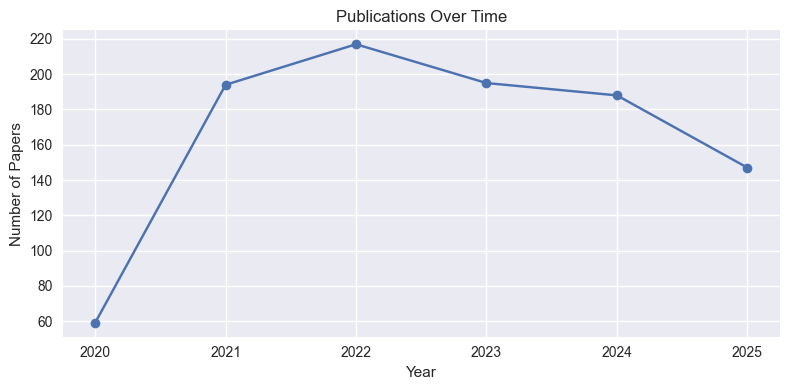

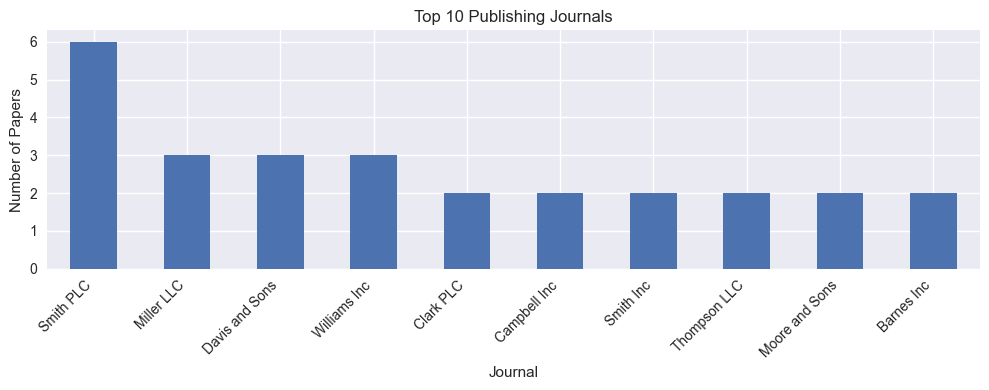

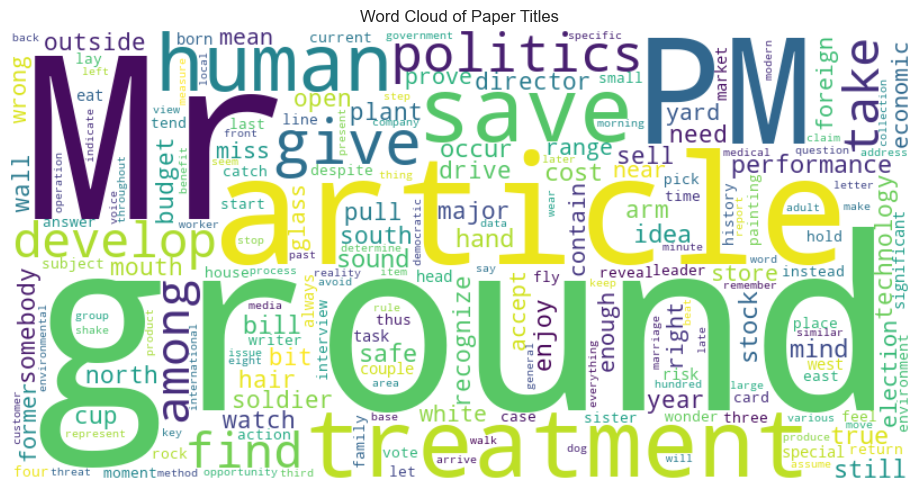

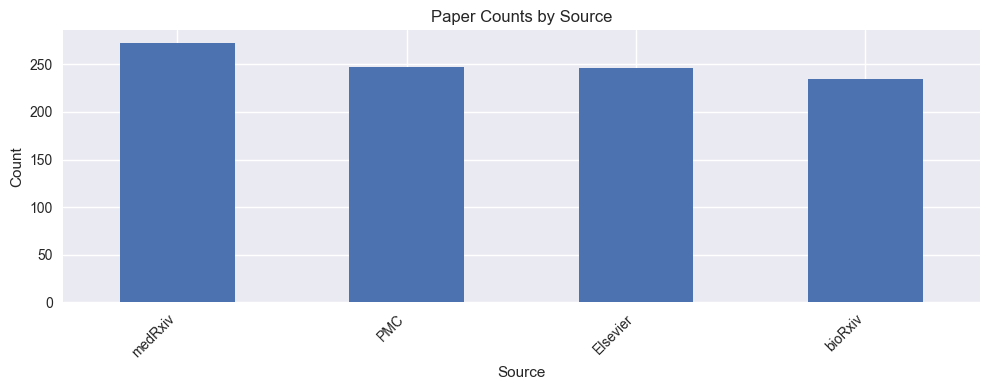

In [4]:

import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# ---  Basic Analysis ---

# Count papers by publication year
pubs_per_year = df_clean['publish_year'].value_counts().sort_index()
print("Publications per year:\n", pubs_per_year)

# Identify top journals publishing COVID-19 research
top_journals = (
    df_clean['journal']
    .value_counts()
    .head(10)
)
print("\nTop Journals:\n", top_journals)

# Find most frequent words in titles
def most_common_words(series, n=20):
    all_words = " ".join(series.dropna()).lower().split()
    return Counter(all_words).most_common(n)

title_words = most_common_words(df_clean['title'], 20)
print("\nMost common title words:\n", title_words)


# --- Visualizations ---

plt.style.use("seaborn-v0_8")

# a) Number of publications over time
pubs_per_year.plot(kind='line', marker='o', figsize=(8,4))
plt.title("Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.tight_layout()
plt.show()

# b) Bar chart of top publishing journals
top_journals.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Publishing Journals")
plt.xlabel("Journal")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# c) Word cloud of paper titles
title_text = " ".join(df_clean['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.tight_layout()
plt.show()

# d) Distribution of paper counts by source_x
if "source_x" in df_clean.columns:
    source_counts = df_clean["source_x"].value_counts()
    source_counts.plot(kind='bar', figsize=(10,4))
    plt.title("Paper Counts by Source")
    plt.xlabel("Source")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
